In [3]:
from ipynb.fs.full.Util import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix,recall_score,roc_auc_score,roc_curve,precision_score,f1_score,auc,accuracy_score

In [4]:
#pip install --upgrade scikit-learn

In [5]:
#load data
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [6]:
train.shape, test.shape

((200000, 202), (200000, 201))

In [7]:
print(train.head())
print(test.head())

   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0

In [8]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB
None


In [9]:
#checking data types
print(train.dtypes)
print(test.dtypes)

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object
ID_code     object
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object


In [10]:
train.describe(include="all")

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
unique,200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train_134066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,NaN,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,NaN,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,NaN,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,NaN,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,NaN,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800


In [11]:
test.describe(include="all")

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
unique,200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,test_106490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,NaN,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,NaN,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,NaN,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,NaN,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,NaN,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400


<AxesSubplot:>

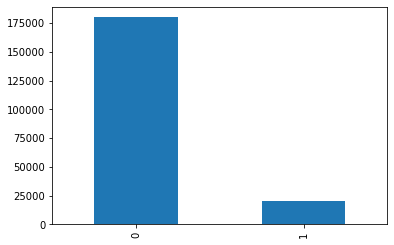

In [12]:
train['target'].value_counts().plot(kind='bar')

<p> Imbalanced dataset is observed

## Checking if any missing values

In [13]:
train.isna().sum().sum(),test.isna().sum().sum()

(0, 0)

## Checking the distribution (mean, standard deviation, skewness, kurtosis) of train dataset
<p> Plotting a histogram of the mean values for each record based on the target variable

In [14]:
#columns = list(train.columns)
#columns.remove('target')
#columns.remove('ID_code')
columns=train.columns[2:]

target0 = train[train['target']==0]
target1= train[train['target']==1]
# plt.figure(figsize=(10,5))
# plt.title("Distribution of mean row data based on target ")
# sns.distplot(target0[columns].mean(axis=1),color='blue',kde=True,bins=100,label='target0')
# sns.distplot(target1[columns].mean(axis=1),color='red',kde=True,bins=100,label='target1')
# plt.legend()
# plt.show()

Text(0.5, 1.0, 'Mean Frequency')

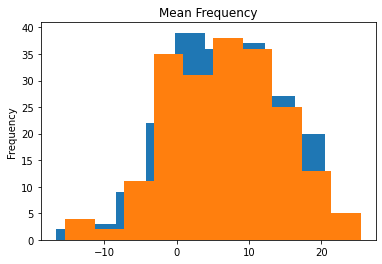

In [15]:
target0[columns].mean().plot(kind='hist')
target1[columns].mean().plot(kind='hist')
plt.title('Mean Frequency')

<p> Above figure shows depicts a small variation in the mean of all features that could explain the target variable and their histograms have a shape like the one of a normal distribution

Text(0.5, 1.0, 'Standard Deviation Frequency')

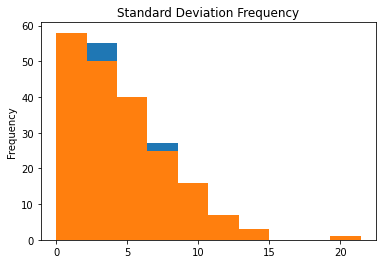

In [16]:
target0[columns].std().plot(kind='hist')
target1[columns].std().plot(kind='hist')
plt.title('Standard Deviation Frequency')

<p> Above figure shows depicts a small variation in the mean of all features that could explain the target variable.

Text(0.5, 1.0, 'Skewness Frequency')

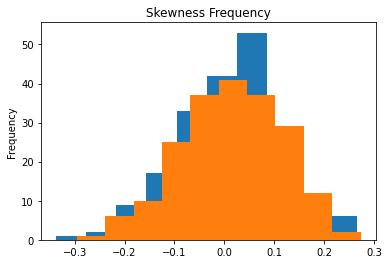

In [17]:
target0[columns].skew().plot(kind='hist')
target1[columns].skew().plot(kind='hist')
plt.title('Skewness Frequency')

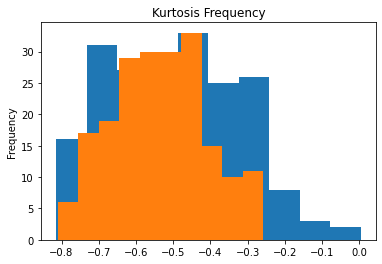

In [18]:
target0[columns].kurt().plot(kind='hist');
target1[columns].kurt().plot(kind='hist');
plt.title('Kurtosis Frequency');

<p> Both Skewness and Kurtosis show that the features distributions are like a normal one.

## Looking at Correlation 

<AxesSubplot:>

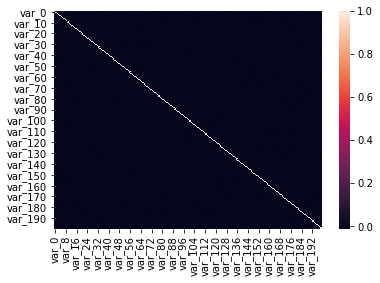

In [19]:
corr_matrix = train[columns].corr()
sns.heatmap(corr_matrix)

<p> From above figure we conlcude that all 200 features show a low correlation with each other. Let us look at the correlation numerically too

In [20]:
corr = train.corr()
high_corr = np.where(corr>0.5)
high_corr = [(corr(x),corr(y)) for x,y in zip(*high_corr) if x!=y and x<y]
if len(high_corr)==0:
    print("There are no correlated variables")

There are no correlated variables


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

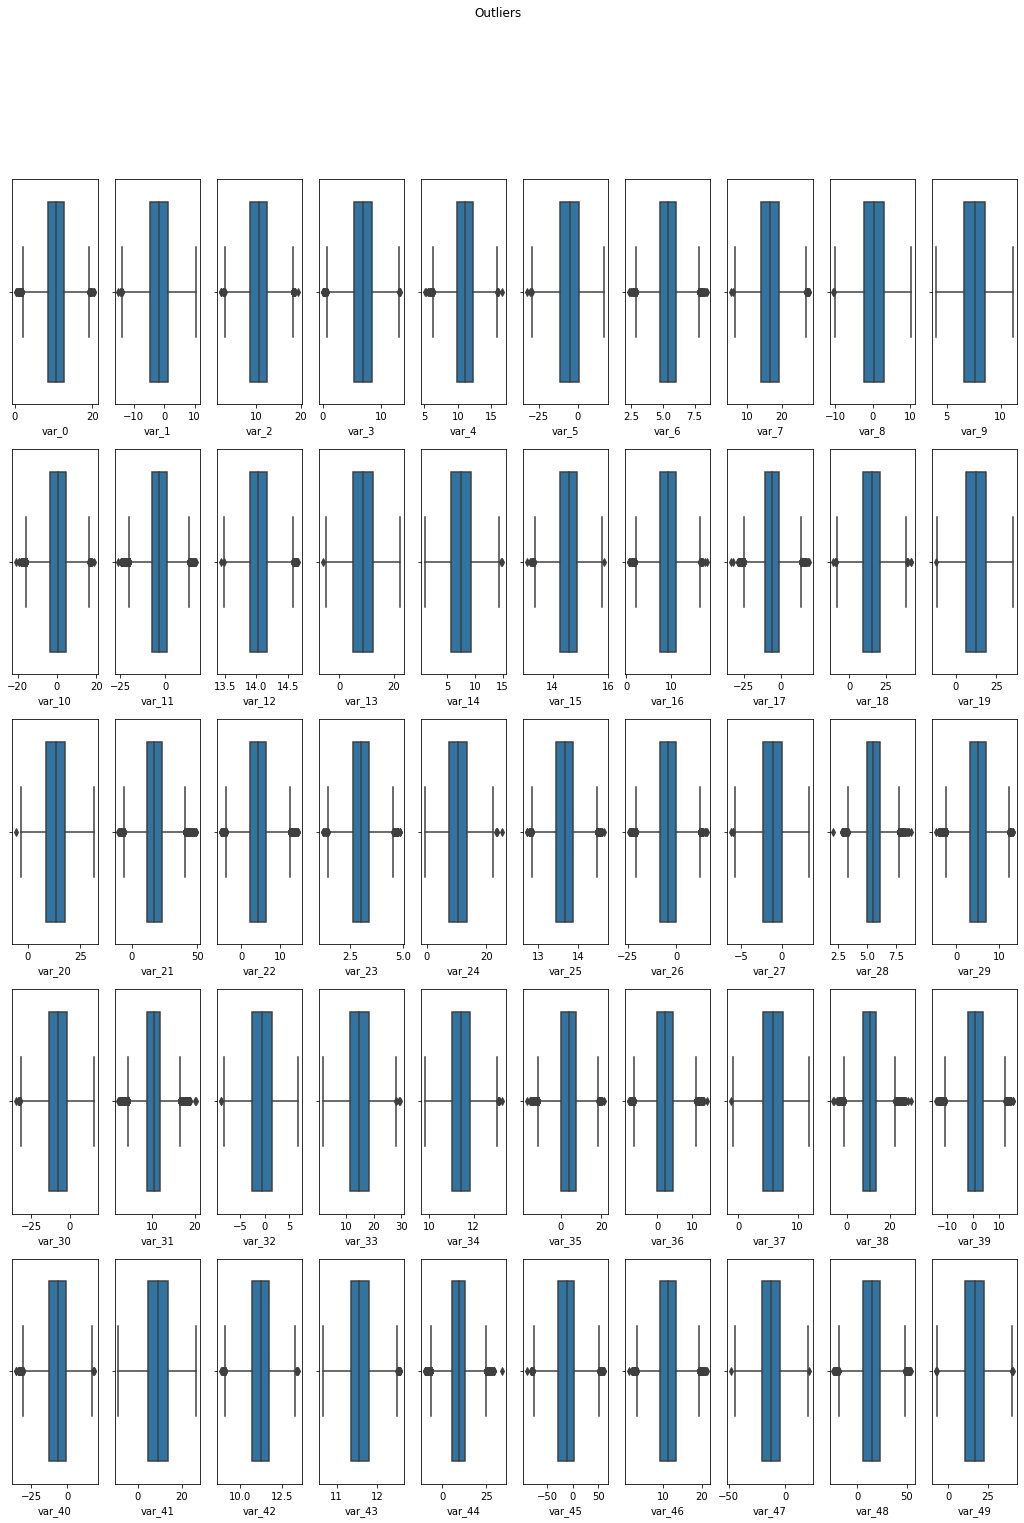

In [21]:
boxplot_func(train,columns[:50])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

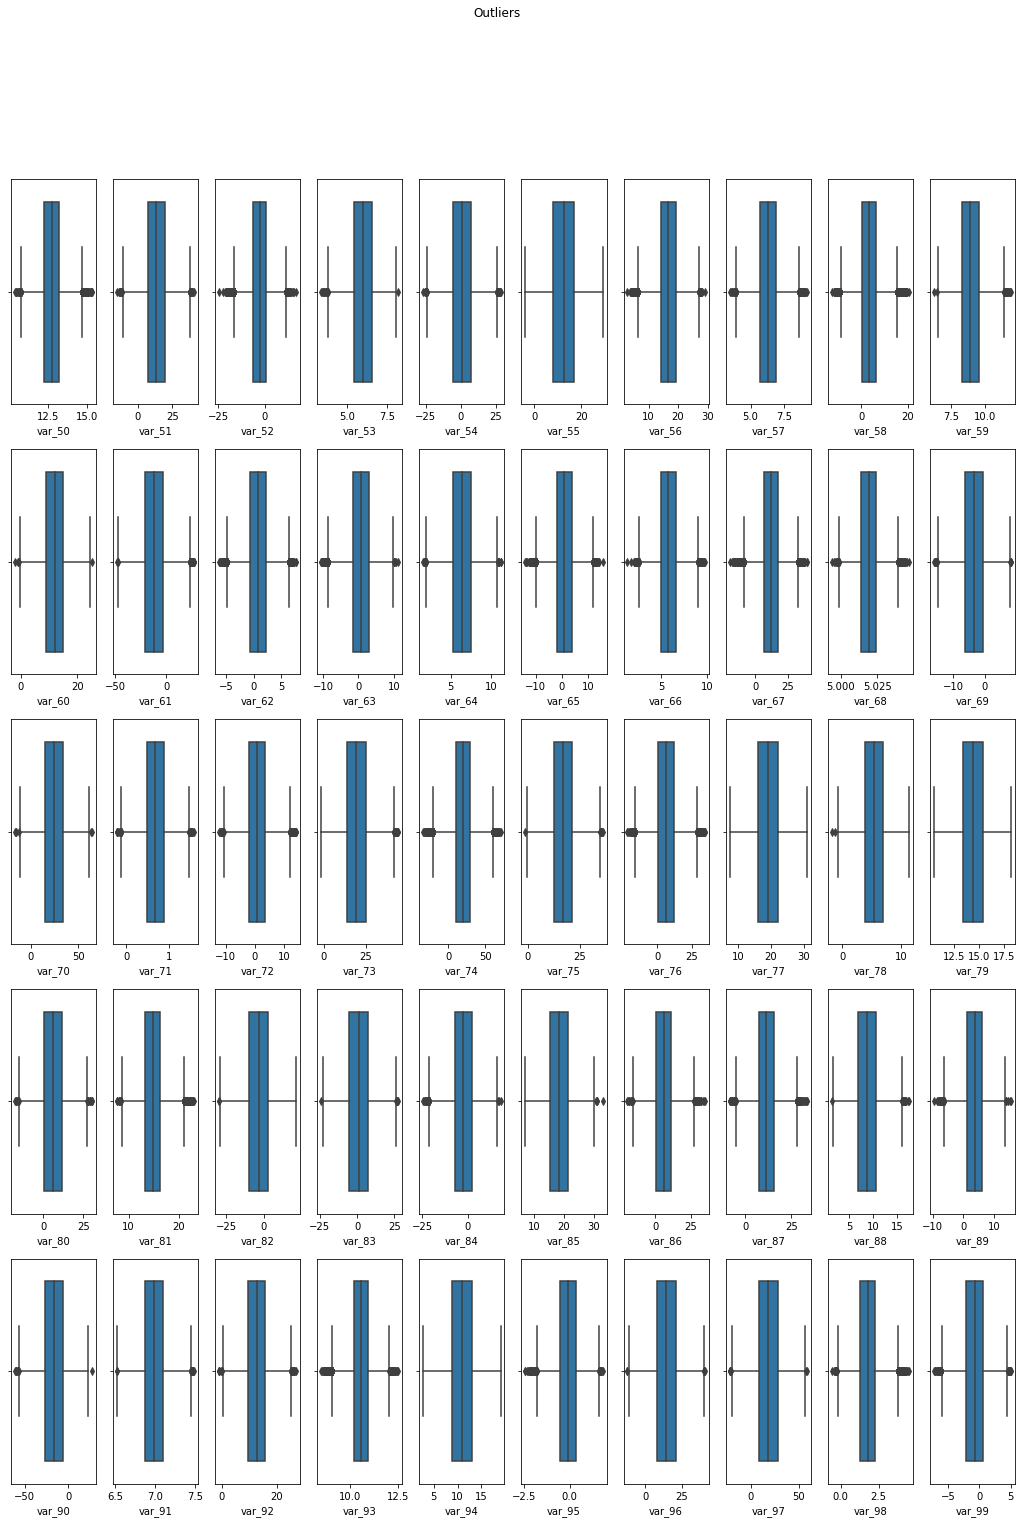

In [22]:
boxplot_func(train,columns[50:100])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

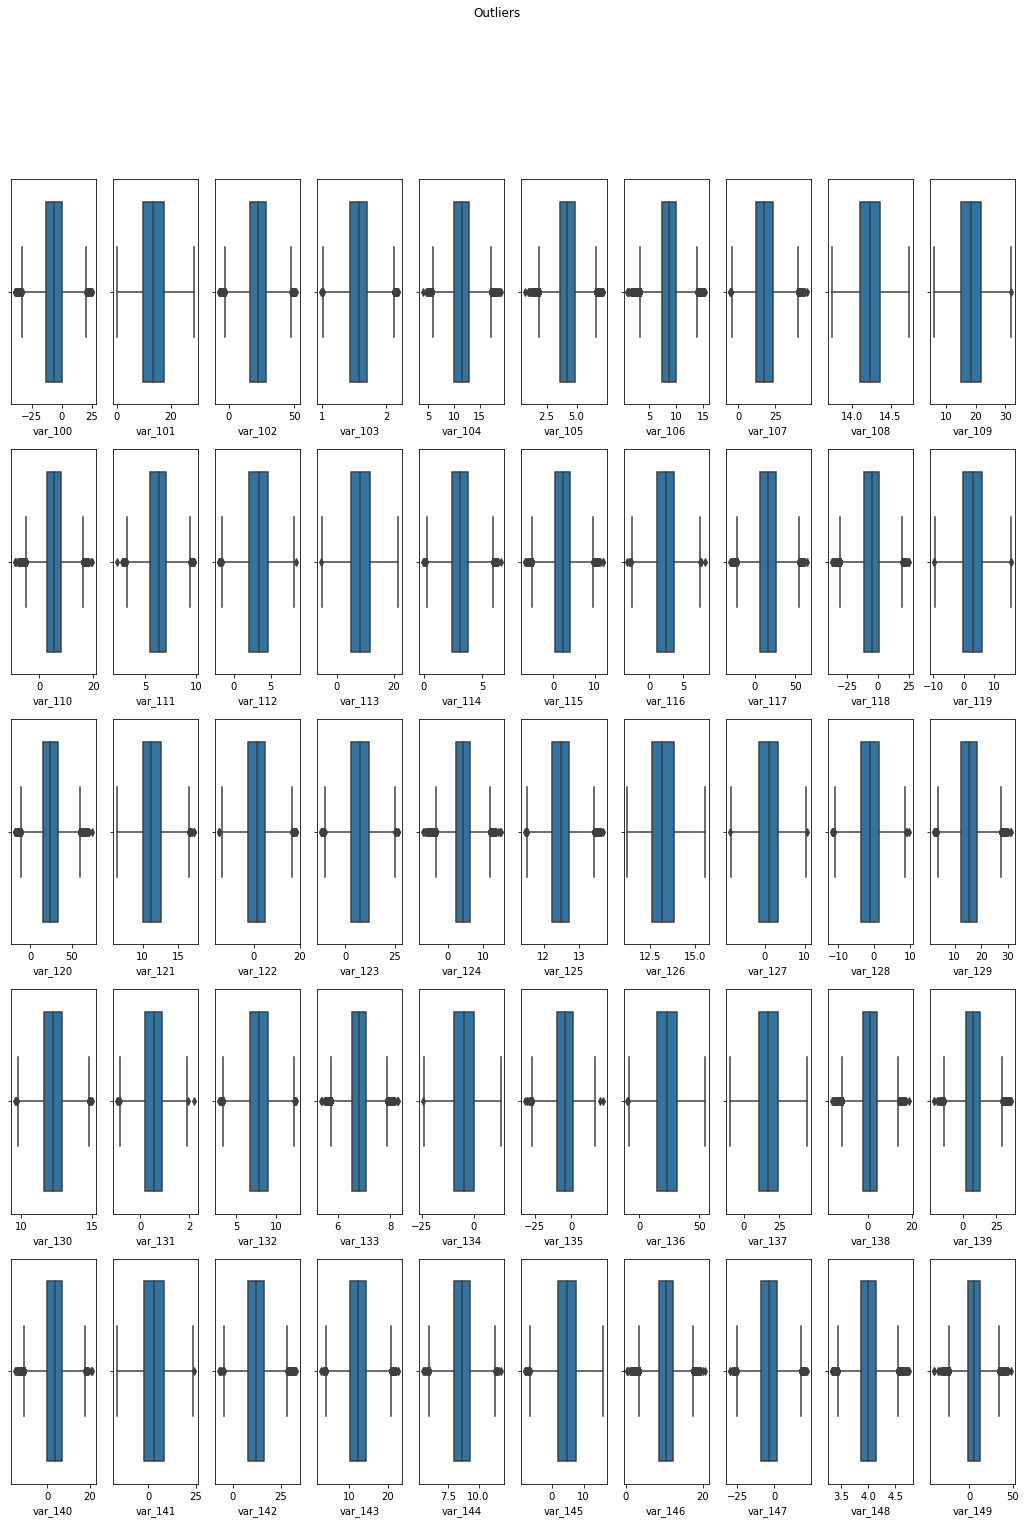

In [23]:
boxplot_func(train,columns[100:150])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

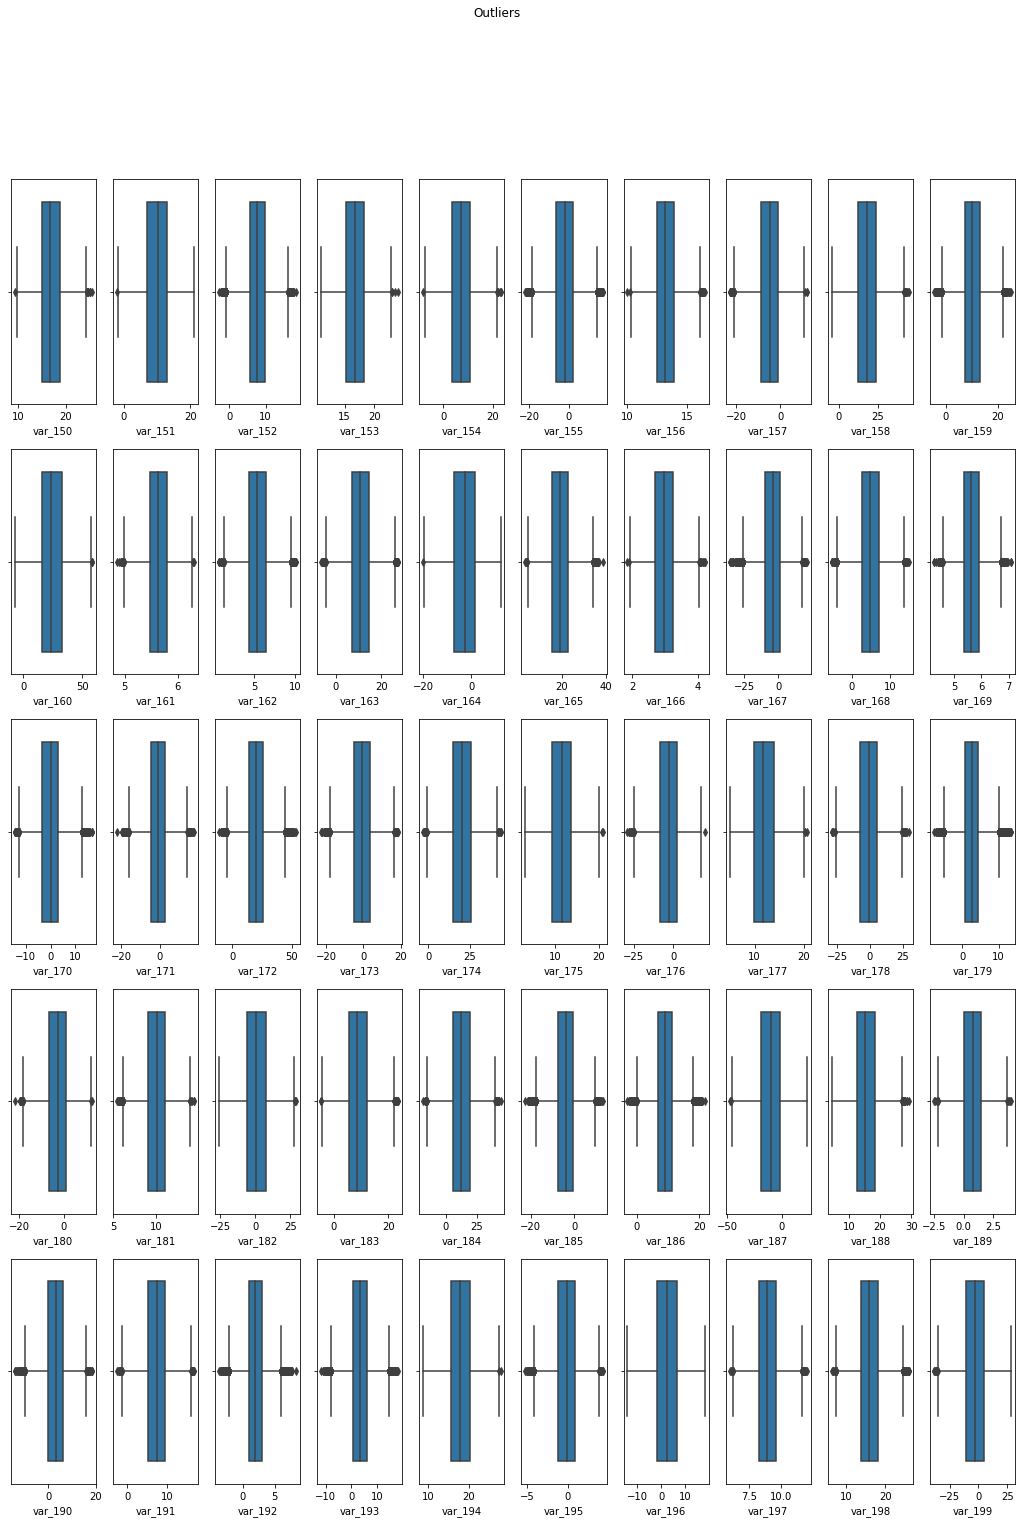

In [24]:
boxplot_func(train,columns[150:200])

In [25]:
columns=train.columns[2:]
train = remove_Outliers(train,columns)

Old Shape:  (200000, 202)
New Shape:  (199896, 202)
Total number of observations dropped in train set: 104


### Rechecking the distribution of train data after outlier removal

<AxesSubplot:>

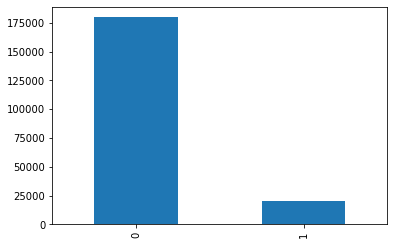

In [26]:
train['target'].value_counts().plot(kind='bar')

In [27]:
train['target'].value_counts()

0    179813
1     20083
Name: target, dtype: int64

### Data transformation to normalise the values across all input variables

In [28]:
std_scaler = StandardScaler()
std_scaler.fit(train[columns].values) 
std_scaler.fit(test[columns].values) 
train_std_df = pd.DataFrame(std_scaler.transform(train[columns].values), columns=columns)
test_std_df = pd.DataFrame(std_scaler.transform(test[columns].values) , columns=columns)

train_std_df['target'] = train['target'].values
train_std_df[columns].describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,...,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000
mean,0.006805,-0.000866,0.002921,0.003973,0.001215,-0.001870,-0.007229,0.004799,0.002164,-0.001734,...,0.009793,-0.006553,0.001352,0.002370,-0.000961,-0.005901,0.002223,-0.004630,0.000526,-0.007769
std,0.999113,1.002391,1.002638,0.995419,1.004114,0.999196,1.002229,0.998091,0.999769,1.002649,...,1.001922,0.999352,0.998979,0.999082,0.998226,0.999758,1.001506,1.000790,1.000814,1.003833
min,-2.849908,-3.321163,-3.261480,-3.326522,-3.712822,-3.496135,-3.547960,-3.264573,-3.234758,-2.921517,...,-3.797451,-3.355160,-3.878777,-3.780523,-2.961993,-3.586371,-3.029654,-3.205366,-3.180727,-3.424171
25%,-0.725708,-0.771187,-0.753622,-0.747503,-0.738221,-0.781517,-0.748903,-0.754997,-0.778383,-0.771683,...,-0.713805,-0.760547,-0.700200,-0.685109,-0.753593,-0.725440,-0.778230,-0.716285,-0.677901,-0.765914
50%,-0.044205,0.003995,-0.048370,0.017848,0.019797,0.027685,-0.034885,-0.021198,0.034969,0.048944,...,0.003007,-0.036550,-0.016584,0.018479,-0.012344,-0.027309,0.021574,-0.026309,0.021643,0.040789
75%,0.690876,0.738261,0.686847,0.748172,0.733026,0.759340,0.679827,0.751432,0.798229,0.824031,...,0.706679,0.678953,0.691677,0.721717,0.764089,0.673760,0.783248,0.739462,0.729895,0.777333
max,2.817117,2.970188,3.282436,3.117859,3.461285,2.834081,3.507103,3.259671,2.962220,2.907137,...,3.350993,3.060388,4.376095,3.744075,3.162355,3.082210,2.943376,3.353204,3.393454,3.053022


### Applying Sampling techniques

#### 1. Under Sampling 

In [29]:
target0,target1 = train_std_df['target'].value_counts()
df_target0 = train_std_df[train_std_df['target']==0]
df_target1 = train_std_df[train_std_df['target']==1]
df_US = df_target0.sample(target1)
df_train_US = pd.concat([df_US,df_target1],axis=0)
print(df_train_US.target.value_counts())
df_train_US.describe()

1    20083
0    20083
Name: target, dtype: int64


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
count,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,...,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000
mean,0.080682,0.069563,0.076698,0.019105,0.022184,0.039297,0.082267,0.005052,0.028484,-0.059470,...,0.058945,-0.059464,-0.023005,-0.034166,0.032621,0.032710,-0.048798,-0.067573,0.027547,0.500000
std,1.035791,1.027179,1.040691,1.000551,1.013619,1.013763,1.039277,0.997207,1.001747,1.020364,...,1.029631,1.005750,1.008637,1.009431,1.020448,1.007955,1.017294,1.039717,1.004640,0.500006
min,-2.849908,-3.321163,-2.946697,-3.326522,-3.217045,-2.947609,-3.547960,-3.264573,-3.162699,-2.746498,...,-3.355160,-3.543093,-3.780523,-2.878220,-3.416752,-2.994915,-3.205366,-3.094511,-3.424171,0.000000
25%,-0.687459,-0.713577,-0.717174,-0.731476,-0.725060,-0.748388,-0.695646,-0.760911,-0.749140,-0.827858,...,-0.719426,-0.775979,-0.714842,-0.791093,-0.702340,-0.741715,-0.760535,-0.761451,-0.729200,0.000000
50%,0.027765,0.079568,0.030790,0.042035,0.038356,0.067726,0.075387,-0.014788,0.058894,-0.001508,...,0.027480,-0.088850,-0.010315,-0.052495,0.012140,0.055304,-0.065781,-0.045562,0.077712,0.500000
75%,0.778816,0.817571,0.771313,0.755625,0.764545,0.800497,0.793135,0.745131,0.824809,0.771651,...,0.752444,0.637655,0.702239,0.736722,0.722984,0.808659,0.707754,0.688091,0.819769,1.000000
max,2.812310,2.970188,3.282436,2.980626,3.073645,2.794458,3.319173,3.173614,2.772652,2.503439,...,3.002408,3.866082,3.526961,2.960645,3.082210,2.741901,3.302167,3.319668,2.857620,1.000000


#### 2. Over Sampling 

In [30]:
df_OS = resample(df_target1, replace=True, n_samples=179813,random_state=123)

df_train_OS = pd.concat([df_OS,df_target0],axis=0)

len(df_train_OS)
print(df_train_OS['target'].value_counts())
df_train_OS.describe()

1    179813
0    179813
Name: target, dtype: int64


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
count,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,...,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000
mean,0.078257,0.069453,0.078475,0.019237,0.012816,0.037262,0.082860,0.001225,0.027400,-0.059249,...,0.056388,-0.056357,-0.023055,-0.033372,0.030835,0.034492,-0.052565,-0.070350,0.023762,0.500000
std,1.035735,1.024495,1.041165,1.001015,1.012594,1.015764,1.036122,0.997665,1.001311,1.020071,...,1.030756,1.002537,1.009213,1.006895,1.017088,1.010185,1.016974,1.041699,1.005007,0.500001
min,-2.849908,-3.321163,-3.261480,-3.326522,-3.712822,-3.496135,-3.547960,-3.264573,-3.234758,-2.921517,...,-3.355160,-3.878777,-3.780523,-2.961993,-3.586371,-3.029654,-3.205366,-3.180727,-3.424171,0.000000
25%,-0.688521,-0.713663,-0.715086,-0.731622,-0.735252,-0.750287,-0.691656,-0.763422,-0.749845,-0.830294,...,-0.725963,-0.767262,-0.713291,-0.785935,-0.705086,-0.745267,-0.762109,-0.765672,-0.729193,0.000000
50%,0.023829,0.075237,0.031379,0.034582,0.027468,0.067828,0.071281,-0.027258,0.062209,-0.002523,...,0.030851,-0.088985,-0.006261,-0.045776,0.006265,0.056717,-0.070614,-0.052143,0.073197,0.500000
75%,0.776404,0.815257,0.773363,0.760192,0.749234,0.796485,0.795014,0.742934,0.822941,0.772970,...,0.750973,0.634648,0.705499,0.736897,0.720903,0.815944,0.706234,0.692537,0.814871,1.000000
max,2.817117,2.970188,3.282436,3.117859,3.461285,2.834081,3.507103,3.259671,2.962220,2.907137,...,3.060388,4.376095,3.744075,3.162355,3.082210,2.943376,3.353204,3.393454,3.053022,1.000000


### Model Validation

In [31]:
names = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "Naive Bayes"
]

In [32]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10),
    GaussianNB()
]


#### Splitting the train dataset(normalized) into test and train dataset using Stratified KFold technique

In [34]:
X_train,X_test,y_train,y_test=train_test_split_func(df_train_US,'target')

Shape of X_train : (32133, 200)
Shape of X_test : (8033, 200)
Shape of y_train : (32133,)
Shape of y_test : (8033,)


#### Model Validation using undersampled dataset

########## Model Validation for Logistic Regression  ##########
Training Metrics of Logistic Regression
Confusion Matrix
[[12566  3501]
 [ 3549 12517]]
Accuracy: 0.7805993838110353
Precision: 0.7814333874391309
F1 Score: 0.7802643061962349
Recall: 0.7790987177891199


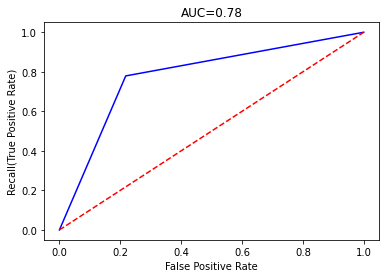

Testing Metrics of Logistic Regression
Confusion Matrix
[[3122  894]
 [ 877 3140]]
Accuracy: 0.779534420515374
Precision: 0.7783837382250868
F1 Score: 0.7800273257980375
Recall: 0.7816778690565098


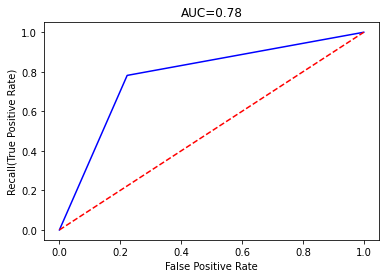

########## Model Validation for Decision Tree  ##########
Training Metrics of Decision Tree
Confusion Matrix
[[11169  4898]
 [ 7291  8775]]
Accuracy: 0.6206703389039305
Precision: 0.6417757624515469
F1 Score: 0.5901341672551196
Recall: 0.5461844889829454


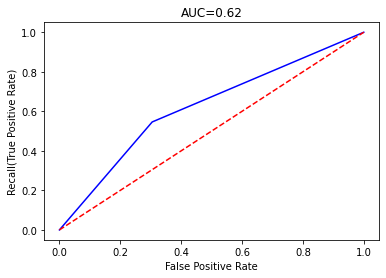

Testing Metrics of Decision Tree
Confusion Matrix
[[2729 1287]
 [1852 2165]]
Accuracy: 0.6092368977965891
Precision: 0.6271726535341831
F1 Score: 0.5797295488017138
Recall: 0.5389594224545681


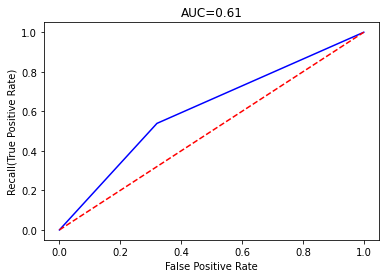

########## Model Validation for Random Forest  ##########
Training Metrics of Random Forest
Confusion Matrix
[[11794  4273]
 [ 5260 10806]]
Accuracy: 0.7033267979958299
Precision: 0.7166257709397175
F1 Score: 0.6939155562690642
Recall: 0.6726005228432715


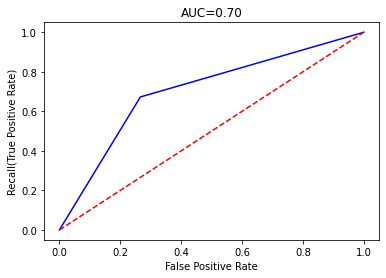

Testing Metrics of Random Forest
Confusion Matrix
[[2842 1174]
 [1417 2600]]
Accuracy: 0.6774554960786755
Precision: 0.688924218335983
F1 Score: 0.6674367860351688
Recall: 0.6472491909385113


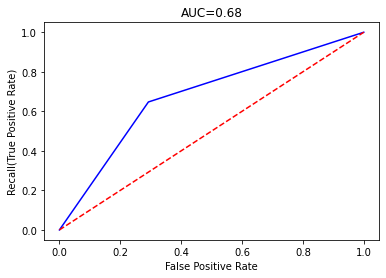

########## Model Validation for Naive Bayes  ##########
Training Metrics of Naive Bayes
Confusion Matrix
[[13132  2935]
 [ 3139 12927]]
Accuracy: 0.8109731428749261
Precision: 0.814966586811247
F1 Score: 0.8097594587822602
Recall: 0.8046184488982945


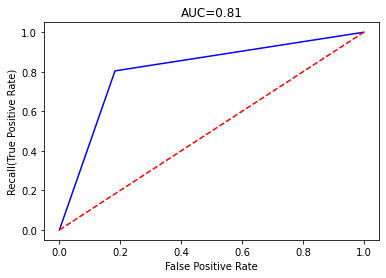

Testing Metrics of Naive Bayes
Confusion Matrix
[[3227  789]
 [ 758 3259]]
Accuracy: 0.807419394995643
Precision: 0.8050889328063241
F1 Score: 0.8081835089894607
Recall: 0.8113019666417725


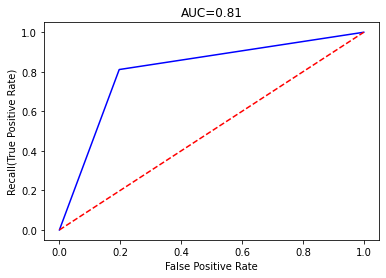

In [35]:
model_name_US, model_US=model_validation(names,classifiers,X_train,X_test,y_train,y_test)

In [36]:
model_name_US, model_US

('Naive Bayes', GaussianNB())

In [37]:
X_train,X_test,y_train,y_test=train_test_split_func(df_train_OS,'target')

Shape of X_train : (287701, 200)
Shape of X_test : (71925, 200)
Shape of y_train : (287701,)
Shape of y_test : (71925,)


#### Model Validation using oversampled dataset

########## Model Validation for Logistic Regression  ##########
Training Metrics of Logistic Regression
Confusion Matrix
[[112534  31316]
 [ 31692 112159]]
Accuracy: 0.7809948522945697
Precision: 0.781732009060812
F1 Score: 0.7807090204158343
Recall: 0.7796887056746217


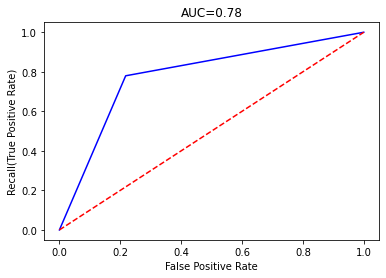

Testing Metrics of Logistic Regression
Confusion Matrix
[[28053  7910]
 [ 7890 28072]]
Accuracy: 0.7803267292318388
Precision: 0.7801678617086321
F1 Score: 0.7803847436895364
Recall: 0.7806017462877481


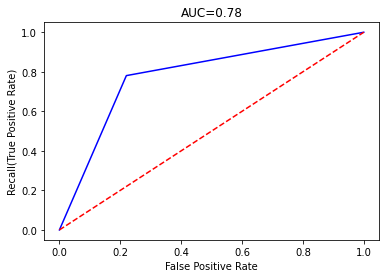

########## Model Validation for Decision Tree  ##########
Training Metrics of Decision Tree
Confusion Matrix
[[102737  41113]
 [ 70537  73314]]
Accuracy: 0.6119234900122001
Precision: 0.6407054279147404
F1 Score: 0.5677138587103819
Recall: 0.5096523486107153


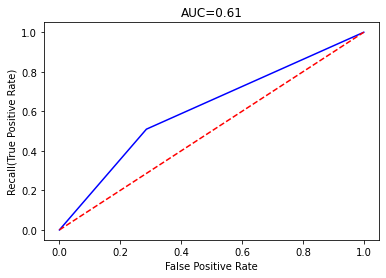

Testing Metrics of Decision Tree
Confusion Matrix
[[25649 10314]
 [17709 18253]]
Accuracy: 0.610385818561001
Precision: 0.6389540378758708
F1 Score: 0.5657301368377009
Recall: 0.5075635392914744


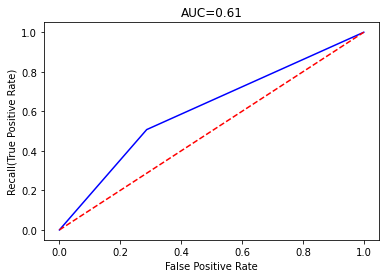

########## Model Validation for Random Forest  ##########
Training Metrics of Random Forest
Confusion Matrix
[[104331  39519]
 [ 51411  92440]]
Accuracy: 0.6839427044049203
Precision: 0.7005206162520177
F1 Score: 0.6703165222435735
Recall: 0.6426093666363112


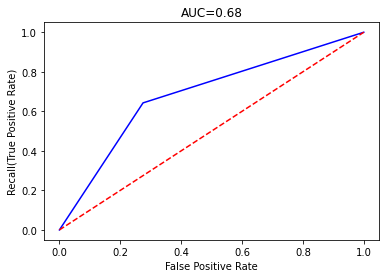

Testing Metrics of Random Forest
Confusion Matrix
[[25867 10096]
 [13027 22935]]
Accuracy: 0.6785123392422663
Precision: 0.6943477339468984
F1 Score: 0.664850057252185
Recall: 0.6377565207719259


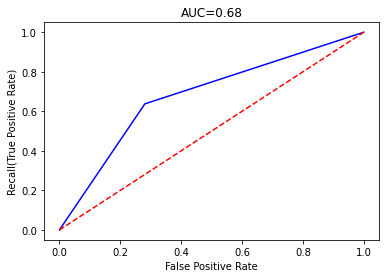

########## Model Validation for Naive Bayes  ##########
Training Metrics of Naive Bayes
Confusion Matrix
[[117119  26731]
 [ 28379 115472]]
Accuracy: 0.8084469640355786
Precision: 0.8120222498822106
F1 Score: 0.8073440679032631
Recall: 0.8027194805736492


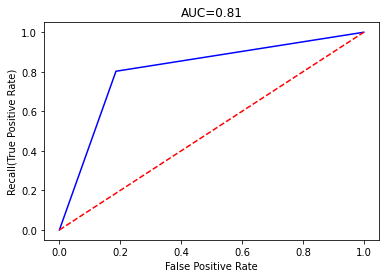

Testing Metrics of Naive Bayes
Confusion Matrix
[[29191  6772]
 [ 7096 28866]]
Accuracy: 0.8071880431004519
Precision: 0.8099781132499018
F1 Score: 0.8063128491620112
Recall: 0.8026806073077137


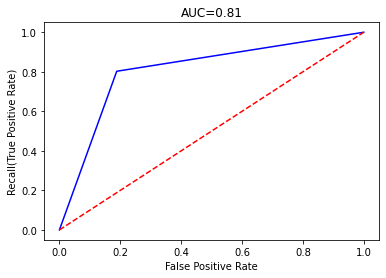

In [38]:
model_name_OS, model_OS=model_validation(names,classifiers,X_train,X_test,y_train,y_test)

In [39]:
model_name_OS, model_OS

('Naive Bayes', GaussianNB())

In [40]:
def plotImpFeatures(model,columns,ModelName):
    fig = plt.figure()

    #Important Features
    if ModelName!="Naive Bayes":
        feature_imp = pd.Series(model.feature_importances_,index=columns).sort_values(ascending=False)
        print("Important model Features:\n",feature_imp)

        plt.figure(figsize=(15,15))
        sns.barplot(x=feature_imp, y=feature_imp.index)
        # Add labels to your graph
        plt.title("Feature Importances")
        plt.ylabel("Features")
        plt.xlabel("Importances")
        plt.show()
    else:
        imp = permutation_importance(model, X_test, y_test)
        importances = imp.importances_mean
        std = imp.importances_std
        indices = np.argsort(importances)[::-1]
        feature = pd.DataFrame({"imp":importances,"col":columns})
        feature = feature.sort_values(['imp','col'],ascending=[True,False]).iloc[-30:]
        feature.plot(kind='barh',x='col',y='imp',figsize=(10,7),legend=None)
        plt.title("Feature Importances")
        plt.ylabel("Features")
        plt.xlabel("Importances")
        plt.show()

<Figure size 432x288 with 0 Axes>

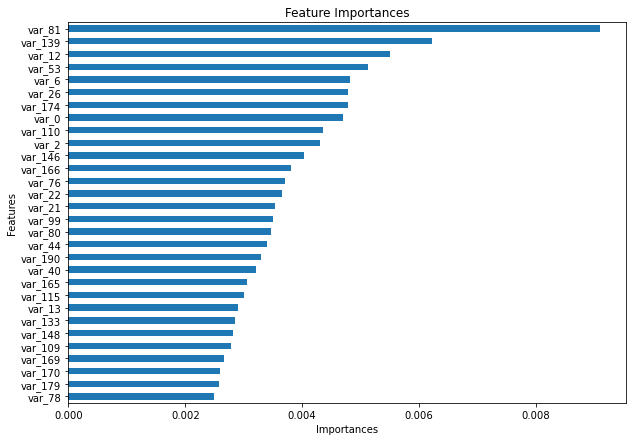

In [41]:
plotImpFeatures(model_OS,columns,model_name_OS)

### Making Predictions using test dataset

In [45]:
#test_std_df.drop(['ID_code'],axis=1,inplace=True)
predictions = model_OS.predict(test_std_df)

<AxesSubplot:>

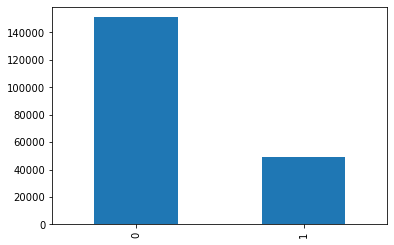

In [46]:
pd.Series(predictions).value_counts().plot(kind='bar')

### Export the selected model (for deployment)

In [48]:
#Export the selected model
filename = 'naive_model.pkl'
pickle.dump(model_OS, open(filename, 'wb'))

model_final = pickle.load(open('QDA_model.pkl','rb'))
print(model_final.predict(test_std_df[columns]))

[1 1 1 ... 0 0 0]


### Submission File as per the requirement

In [49]:
submission_naive = pd.DataFrame({"ID_code": test['ID_code'].values})
submission_naive["target"] = predictions
submission_naive.to_csv("submission_naive.csv", index=False)